In [1]:
pip install -r requirements.txt

  Using cached pycopy-webbrowser-0.0.0.tar.gz (631 bytes)
Note: you may need to restart the kernel to use updated packages.


ERROR: pycopy-webbrowser==0.0.0 from https://files.pythonhosted.org/packages/40/6f/3534aa5470f69aede4ec969a4f64981892e5bd838ea8e148d8d7ee52f1bc/pycopy-webbrowser-0.0.0.tar.gz (from -r requirements.txt (line 6)) does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import os
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
import csv
import pandas as pd
import webbrowser
import matplotlib.pyplot as plt
from collections import Counter
import requests

In [54]:
%env JOB_DESC =  
%env USERNAME =  
%env PASSWORD = 
%env API_KEY = 

env: JOB_DESC=
env: USERNAME=
env: PASSWORD=
env: API_KEY=


In [34]:
Driver_path =  './chromedriver.exe'
driver = webdriver.Chrome(executable_path=Driver_path)
search_item = os.environ['JOB_DESC']
search_item = search_item.replace(" ","-")+"-jobs"
complete_url = "https://www.linkedin.com/jobs/"+search_item
driver.get(complete_url)
time.sleep(2)


#Fetching details start

#scrolling the website -- increase the range number if you want more companies
# for i in range(2):
#     driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
#     time.sleep(3)

job_names = driver.find_element(By.CLASS_NAME,'jobs-search__results-list').find_elements(By.TAG_NAME,'span')
job_names_list = [job_name.text for job_name in job_names]
final_jobs = [jobs for jobs in job_names_list if "Actively" not in jobs and "$" not in jobs and "insurance" not in jobs.lower() and "Be an early applicant" not in jobs]

company_names = driver.find_element(By.CLASS_NAME,'jobs-search__results-list').find_elements(By.TAG_NAME,'a')
company_names_list = [job_location.text for job_location in company_names]

job_links = driver.find_element(By.CLASS_NAME,'jobs-search__results-list').find_elements(By.TAG_NAME,'a')
job_links_list = [job_link.get_attribute('href').strip() for job_link in job_links]

#Fetched the data

#Logging in : We are logging in to fetch the skills of the companies. You cannot see the skills if you do not login
clicking_sign_in = driver.find_element(By.PARTIAL_LINK_TEXT,"Sign in").click()
time.sleep(2)
username = os.environ['USERNAME']
password = os.environ['PASSWORD']

driver.find_element(By.ID,"username").send_keys(username)
driver.find_element(By.ID,"password").send_keys(password)
driver.find_element(By.XPATH,"//button[text() = 'Sign in']").click()

time.sleep(3) 
#Logging in closed


C:\Users\saike\AppData\Local\Temp\ipykernel_138396\260211939.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=Driver_path)


In [35]:
#Seperating Job name and location from final_jobs array

job_name = []
place = []
for job in range(len(final_jobs)):
    if(job%2 == 0):
        job_name.append(final_jobs[job])
    else:
        place.append(final_jobs[job])

In [36]:
#Seperating compnay name from company_names_list

company_name = []
for company in range(len(company_names_list)):
    if(company%2 != 0):
        company_name.append(company_names_list[company])
    

In [37]:
#Seperating job link and company link from job_links_list 

job_apply_link = []
for link in range(len(job_links_list)):
    if(link %2 == 0):
        job_apply_link.append(job_links_list[link])


job_apply_link has the links of the job : type = list

company_name has the names of the company : type = list

job_name has the name of the job : type = list

place has the location of the job : type = list

In [38]:
#Writing data into jobs.csv

file_name = "jobs.csv"
data = list(zip(job_name,company_name,place,job_apply_link))
with open(file_name, 'w', newline = '') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Job Title', 'Company_name ','Location','Job Applicaiton Link'])
    csvwriter.writerows(data)

print("CSV File successfully created")

CSV File successfully created


In [39]:
dataframe = pd.read_csv(open("./jobs.csv"))
dataframe

,Job Title,Company_name,Location,Job Applicaiton Link
0,Data Analyst,Finexio,United States,https://www.linkedin.com/jobs/view/data-analys...
1,Data Analyst,PointsBet,"Denver, CO",https://www.linkedin.com/jobs/view/data-analys...
2,Junior Data Analyst - 100% Remote,Visionaire Partners,"Norcross, GA",https://www.linkedin.com/jobs/view/junior-data...
3,Data Analyst,Holmusk,United States,https://www.linkedin.com/jobs/view/data-analys...
4,Data Analyst,Correctional Association of New York,New York City Metropolitan Area,https://www.linkedin.com/jobs/view/data-analys...
5,Junior Data Analyst,CCS Global Tech,"San Francisco, CA",https://www.linkedin.com/jobs/view/junior-data...
6,Data Analyst,LeadStack Inc.,United States,https://www.linkedin.com/jobs/view/data-analys...
7,Data Analyst,SpringbokIT,"Texas, United States",https://www.linkedin.com/jobs/view/data-analys...
8,Data Analyst,Medalogix,United States,https://www.linkedin.com/jobs/view/data-analys...
9,Data Analyst,Insight Global,Los Angeles Metropolitan Area,https://www.linkedin.com/jobs/view/data-analys...


In [40]:
#Fetching skills that are posted in the job description

complete_skills = []

for skills_counter in range(len(job_apply_link)):
# for skills_counter in range(3): #Testing for smaller values

    driver.get(job_apply_link[skills_counter])
    time.sleep(2)
    if(driver.find_element(By.CLASS_NAME,"jobs-unified-top-card__job-insight-text-button").is_displayed()):
        driver.find_element(By.CLASS_NAME,"jobs-unified-top-card__job-insight-text-button").click()
        time.sleep(2)

        skills_fetched = driver.find_element(By.CLASS_NAME,'job-details-skill-match-status-list').find_elements(By.TAG_NAME,'li')
        skills = [skill.text.replace("\nAdd","") for skill in skills_fetched]

        for skill in skills:
            complete_skills.append(skill)
    else:
        pass



All the skills are present in the array  - complete_skills

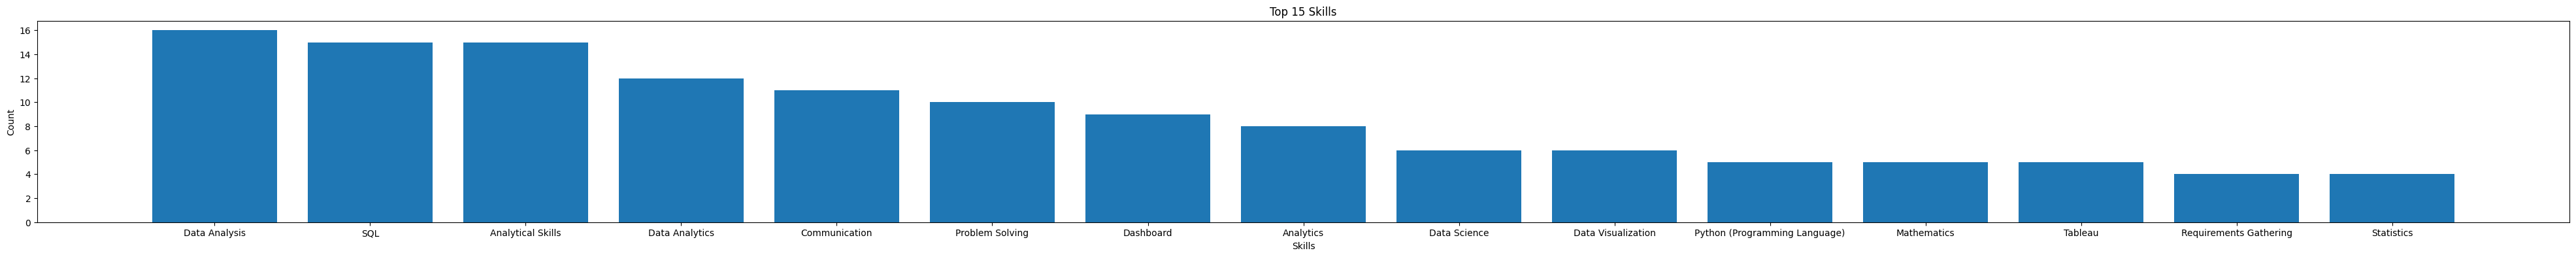

In [41]:
#visualizing the top skills

top_skills = dict(Counter(complete_skills).most_common(15))

plt.figure(figsize=(50, 4))
plt.bar(top_skills.keys(), top_skills.values())
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 15 Skills')
plt.show()

In [42]:
sorted_skills_by_freq = sorted(Counter(complete_skills).items(), key=lambda x: x[1], reverse=True)

In [43]:
list_of_all_skills = [sorted_skills_by_freq[i][0] for i in range(len(sorted_skills_by_freq))]

In [44]:
print(list_of_all_skills)

['Data Analysis', 'SQL', 'Analytical Skills', 'Data Analytics', 'Communication', 'Problem Solving', 'Dashboard', 'Analytics', 'Data Science', 'Data Visualization', 'Python (Programming Language)', 'Mathematics', 'Tableau', 'Requirements Gathering', 'Statistics', 'Visualization', 'Databases', 'Data Mining', 'Computer Science', 'Microsoft Excel', 'Pivot Tables', 'Extract, Transform, Load (ETL)', 'Business Analysis', 'Use Case', 'Snowflake', 'Data Collection', 'Microsoft Azure', 'Process Improvement', 'Data Quality', 'Big Data', 'Pandas (Software)', 'Business Insights', 'Data Engineering', 'Key Performance Indicators', 'Attention to Detail', 'Data Management', 'Microsoft Office', 'Data Models', 'Database Design', 'Looker (Software)', 'Performance Measurement', 'Azure Data Lake', 'Azure Databricks', 'Azure DevOps', 'Data Modeling', 'Process Analysis', 'Electronic Health Records (EHR)', 'Informatica', 'Presentation Skills', 'Ad Hoc Analysis', 'Microsoft Power BI', 'Applied Mathematics', 'Ma

OPEN AI MODULE

In [45]:
import openai
import gradio as gr 

In [46]:
openai.api_key = os.environ['API_KEY']

In [47]:
def openai_chat(prompt):
    completions = openai.Completion.create(
        engine = "text-davinci-003",
        prompt = prompt,
        max_tokens = 1024,
        n = 1,
        temperature = 0.5
    )

    message = completions.choices[0].text
    return message.strip()


In [52]:
answer = openai_chat("Show me links of top 15 websites where I can learn "+ str(list_of_all_skills[0]) +", "+ str(list_of_all_skills[1])+", "+str(list_of_all_skills[2]) +" for free")

In [53]:
print("-------------------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------")
print("You can learn the top 3 skills for " +os.environ['JOB_DESC'] + " from the following websites: ")
print("-------------------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------")
answer.splitlines()

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
You can learn the top 3 skills for Data Analyst from the following websites: 
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------


['1. Codecademy: https://www.codecademy.com/learn/data-analysis',
 '2. Coursera: https://www.coursera.org/learn/data-analysis',
 '3. Dataquest: https://www.dataquest.io/',
 '4. Udacity: https://www.udacity.com/courses/data-analysis',
 '5. Khan Academy: https://www.khanacademy.org/math/statistics-probability',
 '6. edX: https://www.edx.org/learn/data-analysis',
 '7. DataCamp: https://www.datacamp.com/courses/tech:data-analysis',
 '8. SQLZoo: https://sqlzoo.net/',
 '9. w3schools: https://www.w3schools.com/sql/',
 '10. SQL Tutorial: https://www.sqltutorial.org/',
 '11. Mode Analytics: https://mode.com/sql-tutorial/',
 '12. SQLBolt: https://sqlbolt.com/',
 '13. TutorialsPoint: https://www.tutorialspoint.com/sql/',
 '14. Analytics Vidhya: https://www.analyticsvidhya.com/',
 '15. Data Science Central: https://www.datasciencecentral.com/']